## Exercise 04 — Histogram

Histogram comparing hourly commit counts on working days versus weekends.

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

DB_PATH = '../data/checking-logs.sqlite'


In [9]:
with sqlite3.connect(DB_PATH) as connection:
    commits = pd.read_sql_query(
        """
        SELECT timestamp
        FROM checker
        WHERE uid LIKE 'user_%'
        """,
        connection,
        parse_dates=['timestamp'],
    )

commits.head()


,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [10]:
commits['hour'] = commits['timestamp'].dt.hour
commits['day_type'] = commits['timestamp'].dt.dayofweek.map(
    lambda day: 'weekend' if day >= 5 else 'working_day'
)

working_hours = commits.loc[commits['day_type'] == 'working_day', 'hour'].tolist()
weekend_hours = commits.loc[commits['day_type'] == 'weekend', 'hour'].tolist()
len(working_hours), len(weekend_hours)


(2037, 1170)

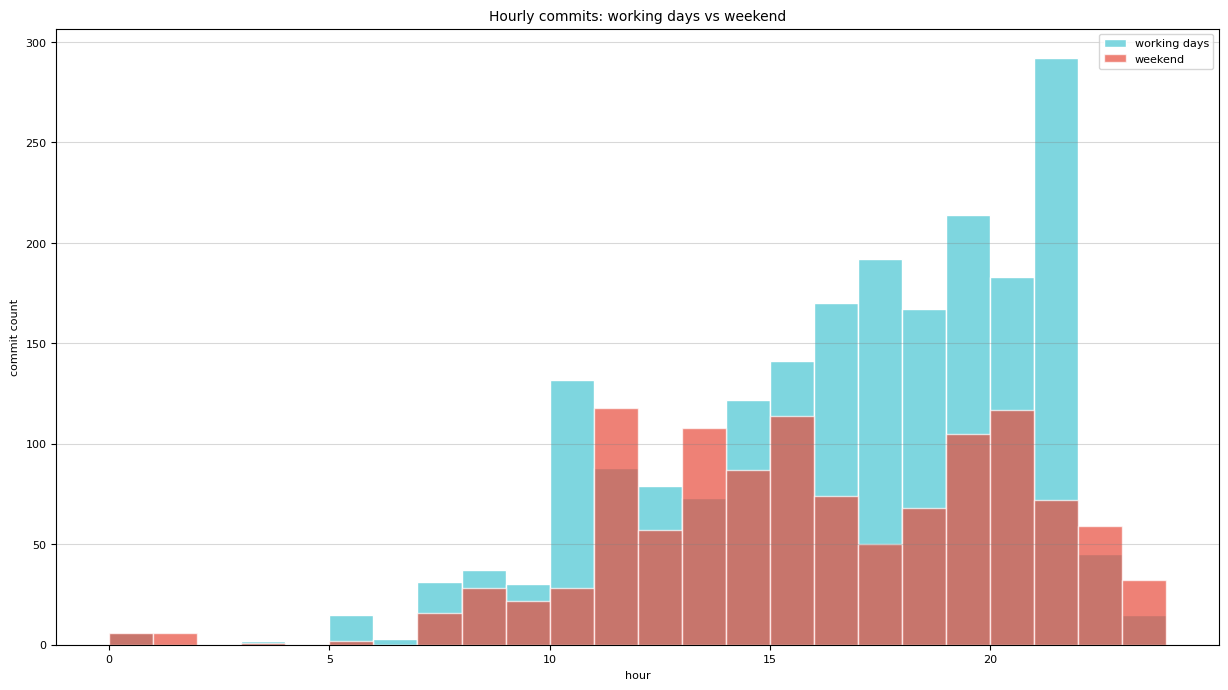

In [16]:
plt.figure(figsize=(15, 8))
bins = range(25)
plt.hist(working_hours, bins=bins, color='#7ed6df', label='working days', alpha=1.0, edgecolor='white')
plt.hist(weekend_hours, bins=bins, color='#e74c3c', label='weekend', alpha=0.7, edgecolor='white')
plt.xlabel('hour', fontsize=8)
plt.ylabel('commit count', fontsize=8)
plt.title('Hourly commits: working days vs weekend', fontsize=10)
plt.xticks(range(0, 25, 5), fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(axis='y', color='gray', alpha=0.3)
plt.show()


In [12]:
hourly_totals = commits.groupby(['day_type', 'hour']).size().unstack(fill_value=0)
diff = (hourly_totals.loc['weekend'] - hourly_totals.loc['working_day']).sort_values(ascending=False)
top_weekend_hours = diff[diff > 0].head(4)
top_weekend_hours


hour
13    35
11    30
23    17
22    14
dtype: int64

**Are there hours when the total number of commits was higher on weekends than on working days?**  
Yes: the four largest differences occur around hours 13, 11, 23, and 22 (weekend totals exceed weekday totals there).